# REVIEW: Unsupervised clustering with mixed categorical and continuous data

Van a ser probadas dos opciones para poder hacer un clustering con variables tanto categoricas como numericas:
- **k-prototypes algorithm**.
- **FAMD (factor analysis for mixed data)**: Roughly, we can say that FAMD works as a *principal components analysis* (PCA) for quantitative variables and as a *multiple correspondence analysis* (MCA) for qualitative variables.

### References:
- [Blog Tomas Beuzen - "Unsupervised clustering with mixed categorical and continuous data"](https://www.tomasbeuzen.com/post/clustering-mixed-data/)
- [Wiki - "Factor analysis of mixed data"](https://en.wikipedia.org/wiki/Factor_analysis_of_mixed_data)
- [Vivek Yadav's blog - "Multiple Correspondance Analysis (MCA) - Introduction"](http://vxy10.github.io/2016/06/10/intro-MCA/)
- [Paper - "Multiple Correspondence Analysis", Hervé Abdi1 & Dominique Valentin](https://personal.utdallas.edu/~herve/Abdi-MCA2007-pretty.pdf)

In [4]:
%%capture
!pip install prince
!pip install kmodes

In [6]:
import numpy as np
import pandas as pd
from prince import FAMD
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
random_state = 1234

### functions

In [36]:
def plot_cluster(X, y, title="Cluster plot"):
    d_colors = {0:'red', 1:'green', 2:'blue'}
    fig = X.plot.scatter(x='X1', y='X2', color=[d_colors[k] for k in y], title = title)
    return fig



### data creation

In [37]:
X, y = make_blobs(n_samples=50, centers=3, n_features=3, random_state=random_state)
X = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
X['X3'] = np.where(X['X3'] < 0, 'LOW', 'HIGH')
con_feats = ['X1', 'X2'] 
cat_feats = ['X3']
scale = StandardScaler()
X[con_feats] = scale.fit_transform(X[con_feats])
print(X.shape)
X.head()

(50, 3)


,X1,X2,X3
0,-0.495194,0.963114,HIGH
1,-0.548021,-1.762852,LOW
2,1.101047,0.935499,LOW
3,-0.694720,-1.779252,LOW
4,1.261093,0.964404,LOW


### REVIEW

<AxesSubplot:title={'center':'True Data'}, xlabel='X1', ylabel='X2'>

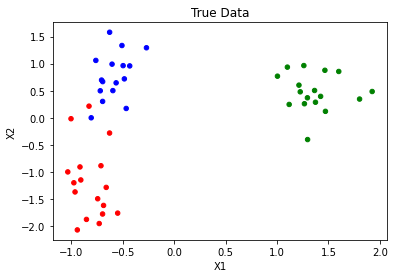

In [38]:
## True data (only numerical variables)
fig = plot_cluster(X, y, title="True Data")
fig

<AxesSubplot:title={'center':'Numerical Only'}, xlabel='X1', ylabel='X2'>

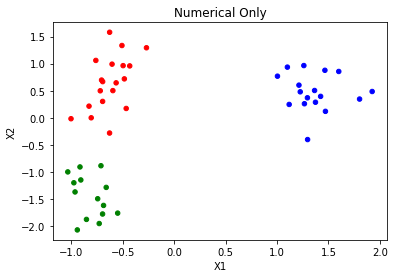

In [41]:
## Cluster based on numerical data only
model = KMeans(n_clusters=3, random_state=random_state).fit(X[con_feats])
pred = model.labels_
fig = plot_cluster(X, pred, title="Numerical Only")
fig


<AxesSubplot:title={'center':'Encoded Categorical Data'}, xlabel='X1', ylabel='X2'>

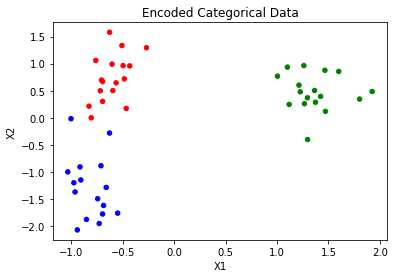

In [42]:
## Encode the categorical data before clustering
model = KMeans(n_clusters=3, random_state=random_state).fit(pd.get_dummies(X))
pred = model.labels_
fig = plot_cluster(X, pred, title="Encoded Categorical Data")
fig

<AxesSubplot:title={'center':'k-prototypes'}, xlabel='X1', ylabel='X2'>

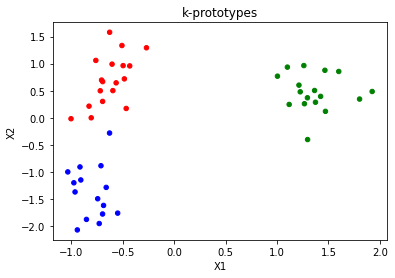

In [43]:
## Use the k-prototypes algorithm
pred = KPrototypes(n_clusters=3).fit_predict(X, categorical=[2])
fig = plot_cluster(X, pred.astype(float), title="k-prototypes")
fig

In [44]:
## Use FAMD to create continuous features for clustering
famd = FAMD(n_components=3).fit(X)
famd.row_coordinates(X).head()

,0,1,2
0,-1.490188,-0.727814,0.174512
1,0.799817,1.672614,-0.085921
2,1.258315,-0.938935,0.201369
3,0.744471,1.749699,-0.005344
4,1.317980,-1.030678,0.118688


<AxesSubplot:title={'center':'FAMD + Clustering'}, xlabel='X1', ylabel='X2'>

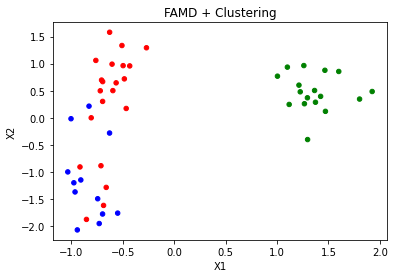

In [45]:
model = KMeans(n_clusters=3, random_state=random_state).fit(famd.row_coordinates(X))
pred = model.labels_
fig = plot_cluster(X, pred, title="FAMD + Clustering")
fig

### Conclusiones

La ultima aproximacion, ademas de de dar buenos resultados, implica una previa reduccion de dimensionalidad lo que permite analizar datasets sin importar el numero de variables y el tipo de las mismas (cuantitativas, cualitativas).